## AUC

AUC là viết tắt của "Area Under the ROC Curve" trong tiếng Anh, dịch sang tiếng Việt là "Diện tích dưới đường cong ROC". Đây là một phép đo quan trọng trong đánh giá hiệu suất của mô hình phân loại (classifier) trong trường hợp binary classification (phân loại nhị phân).

Để hiểu AUC, hãy cùng nhau xem xét đến đường cong ROC (Receiver Operating Characteristic curve). ROC curve biểu diễn sự tương quan giữa tỷ lệ True Positive Rate (TPR) và tỷ lệ False Positive Rate (FPR) của mô hình phân loại, khi ngưỡng phân loại thay đổi từ 0 đến 1.

- True Positive Rate (TPR), còn gọi là Sensitivity hoặc Recall, đo lường tỷ lệ các trường hợp positive mà mô hình dự đoán chính xác.
- False Positive Rate (FPR) đo lường tỷ lệ các trường hợp negative bị phân loại sai (tức là dự đoán nhầm thành positive).

AUC là diện tích nằm dưới đường cong ROC và nó thể hiện khả năng của mô hình phân loại phân biệt giữa hai lớp positive và negative. AUC càng lớn thì mô hình càng có khả năng phân loại tốt hơn, với AUC = 1 thể hiện mô hình hoàn hảo, trong khi AUC = 0.5 chỉ ra mô hình không khác biệt so với một dự đoán ngẫu nhiên.

AUC là một phép đo định lượng và phổ biến trong đánh giá hiệu suất của các mô hình phân loại như Logistic Regression, Support Vector Machines (SVM), Random Forest, Neural Networks, và nhiều mô hình khác.

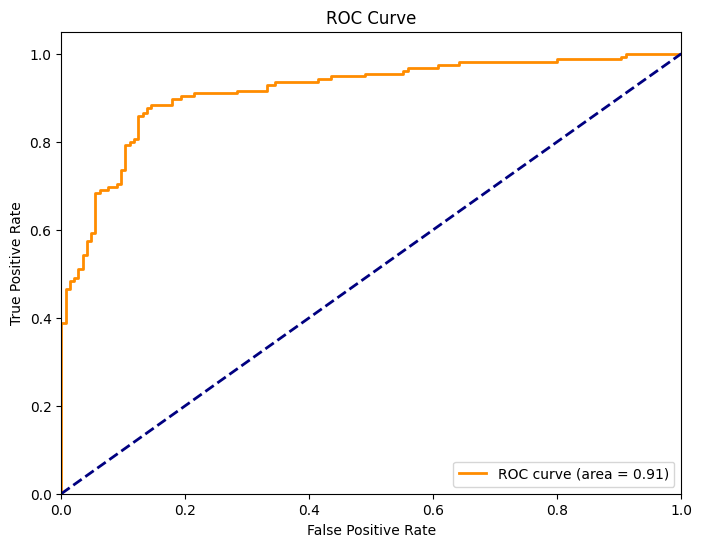

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Tạo dữ liệu mẫu cho binary classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tạo mô hình Logistic Regression và huấn luyện trên tập train
model = LogisticRegression()
model.fit(X_train, y_train)

# Tính xác suất dự đoán của mô hình trên tập test
y_prob = model.predict_proba(X_test)[:, 1]

# Tính đường cong ROC và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Liên hệ AUC và thống kê Mann-Whitney

1. Thống kê Mann-Whitney (U-test):

    Giả sử bạn có hai nhóm dữ liệu độc lập, \(X\) và \(Y\), với kích thước lần lượt là \(n_x\) và \(n_y\). Để tính U-statistic, bạn cần xếp hạng dữ liệu trong mỗi nhóm và tính tổng các xếp hạng trong nhóm \(X\), ký hiệu là \(R_X\). Sau đó, U-statistic được tính bằng công thức:

    $$ U = n_x \cdot n_y + \frac{n_x \cdot (n_x + 1)}{2} - R_X $$

1. Nếu \(U\) là giá trị U-statistic (thống kê Mann-Whitney), thì AUC được tính như sau:

    $$ AUC = \frac{U - \frac{n_x \cdot (n_x + 1)}{2}}{n_x \cdot n_y} $$

1. DeLong's test:

    Giả sử bạn có hai mô hình phân loại và đã tính được các xác suất dự đoán của chúng trên tập dữ liệu kiểm tra. Để thực hiện kiểm định DeLong, bạn cần tính U-statistic và phương sai của U-statistic (Var(U)) như đã giải thích trước đó.

    Tiếp theo, để tính Z-score, bạn cần có AUC của hai mô hình (\(AUC_1\) và \(AUC_2\)) và Var(U) như sau:

    $$ Z = \frac{AUC_1 - AUC_2}{\sqrt{\text{Var}(U)}} $$

    Sau đó, sử dụng Z-score để tính p-value, và nếu p-value nhỏ hơn mức ý nghĩa đã chọn (thường là 0.05), bạn có thể kết luận rằng có sự khác biệt đáng kể giữa AUC của hai mô hình.

1. Công thức tính khoảng tin cậy (confidence interval) cho AUC dựa trên phương pháp DeLong như sau:

    Giả sử bạn đã tính được U-statistic (U) và Var(U) từ kiểm định DeLong, thì khoảng tin cậy 95% cho AUC sẽ được tính bằng công thức sau:

    $$ \text{CI}_{\text{lower}} = AUC - z_{\alpha/2} \cdot \sqrt{\text{Var}(U)} $$

    $$ \text{CI}_{\text{upper}} = AUC + z_{\alpha/2} \cdot \sqrt{\text{Var}(U)} $$

    Trong đó:
    - AUC là diện tích dưới đường cong ROC đã tính từ mô hình phân loại và tập dữ liệu.
    - Var(U) là phương sai của U-statistic, tính từ kiểm định DeLong.
    - \( z_{\alpha/2} \) là giá trị thống kê từ phân phối chuẩn tương ứng với mức đáng tin cậy 95%. Với mức đáng tin cậy 95%, \( \alpha = 0.05 \), nên \( z_{\alpha/2} \) tương ứng với giá trị thống kê 1.96.

    Khoảng tin cậy này sẽ cho phép bạn ước tính khoảng giá trị mà AUC có thể nằm trong với mức đáng tin cậy 95%.

    $$ \text{var(U)} = \frac{U \cdot (n_{\text{positives}} + n_{\text{negatives}} + 1) \cdot (n_{\text{positives}} + n_{\text{negatives}} - U)}{12} $$

    Trong đó:
    - \( U \) là giá trị U-statistic đã tính trước đó.
    - \( n_{\text{positives}} \) là số lượng điểm dữ liệu positive (nhãn dương) trong tập dữ liệu.
    - \( n_{\text{negatives}} \) là số lượng điểm dữ liệu negative (nhãn âm) trong tập dữ liệu.

## Tính khoảng tin cậy AUC sử dụng phương pháp `Delong`

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from scipy.stats import norm

# Tính AUC cho mô hình ban đầu
auc_model = roc_auc_score(y_test, y_prob)

# Tính U-statistic và phương sai của U-statistic
n_positives = np.sum(y_test)
n_negatives = len(y_test) - n_positives
U = n_positives * n_negatives
var_U = (U * (n_positives + n_negatives + 1) * (n_positives + n_negatives - U)) / 12

# Tính giá trị Z-score tương ứng với mức đáng tin cậy 95%
alpha = 0.05
z_score = norm.ppf(1 - alpha / 2)

# Tính khoảng tin cậy 95% cho AUC bằng phương pháp DeLong
lower_bound = auc_model - z_score * np.sqrt(var_U)
upper_bound = auc_model + z_score * np.sqrt(var_U)

print(f"AUC: {auc_model:.3f}")
print(f"95% Confidence Interval for AUC using DeLong method: [{lower_bound:.3f}, {upper_bound:.3f}]")

AUC: 0.914
95% Confidence Interval for AUC using DeLong method: [-9969.485, 9971.314]


C:\Users\nguye\AppData\Local\Temp\ipykernel_18272\717348408.py:13: RuntimeWarning: overflow encountered in long_scalars
  var_U = (U * (n_positives + n_negatives + 1) * (n_positives + n_negatives - U)) / 12


## Tính khoảng tin cậy AUC sử dụng phương pháp `Bootstrap`

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


# Tính AUC cho mô hình ban đầu
auc_model = roc_auc_score(y_test, y_prob)

# Số lượng lần lấy mẫu (bootstrap iterations)
n_iterations = 1000

# Số lượng mẫu lấy ra từ dữ liệu ban đầu trong mỗi lần lấy mẫu
n_size = len(y_test)

# Tạo mảng để lưu kết quả AUC từ các lần lấy mẫu
auc_scores = []

for _ in range(n_iterations):
    # Lấy ngẫu nhiên mẫu từ dữ liệu với replacement
    indices = np.random.randint(0, n_size, n_size)
    y_true_bootstrap = y_test[indices]
    y_prob_bootstrap = y_prob[indices]
    
    # Tính AUC cho mẫu lấy ra từ dữ liệu bootstrap
    auc_score = roc_auc_score(y_true_bootstrap, y_prob_bootstrap)
    auc_scores.append(auc_score)

# Tính khoảng tin cậy 95% cho AUC
lower_bound = np.percentile(auc_scores, 2.5)
upper_bound = np.percentile(auc_scores, 97.5)

print(f"AUC: {auc_model:.3f}")
print(f"95% Confidence Interval for AUC using bootstrap method: [{lower_bound:.3f}, {upper_bound:.3f}]")

AUC: 0.914
95% Confidence Interval for AUC using bootstrap method: [0.878, 0.943]


## So sánh AUC của hai mô hình máy học sử dụng kiểm định thống kê DeLong


Giả sử AUC của mô hình thứ nhất là \(\text{AUC}_1\) và AUC của mô hình thứ hai là \(\text{AUC}_2\).

Công thức kiểm định DeLong để so sánh AUC của hai mô hình như sau:

$$ U = \frac{\text{AUC}_1 - \text{AUC}_2}{\sqrt{\text{Var}(\text{AUC}_1) + \text{Var}(\text{AUC}_2) - 2 \cdot \text{Cov}(\text{AUC}_1, \text{AUC}_2)}} $$

Trong đó:
- \(\text{Var}(\text{AUC}_1)\) là phương sai của AUC của mô hình thứ nhất.
- \(\text{Var}(\text{AUC}_2)\) là phương sai của AUC của mô hình thứ hai.
- \(\text{Cov}(\text{AUC}_1, \text{AUC}_2)\) là hiệp phương sai giữa AUC của hai mô hình.



In [27]:
import numpy as np
from sklearn.metrics import roc_auc_score
from scipy.stats import norm

# Dữ liệu mẫu cho hai mô hình (y_true là nhãn thực tế, y_prob_model1 và y_prob_model2 là xác suất dự đoán của hai mô hình)
np.random.seed(42)
y_true = np.random.randint(0, 2, size=1000)  # Nhãn thực tế (0 hoặc 1)
y_prob_model1 = np.random.rand(1000)  # Xác suất dự đoán của mô hình thứ nhất
y_prob_model2 = np.random.rand(1000)  # Xác suất dự đoán của mô hình thứ hai

# Tính AUC cho hai mô hình
auc_model1 = roc_auc_score(y_true, y_prob_model1)
auc_model2 = roc_auc_score(y_true, y_prob_model2)

# Tính U-statistic và phương sai của U-statistic
n_positives = np.sum(y_true)
n_negatives = len(y_true) - n_positives
U = n_positives * n_negatives
var_U = (U * (n_positives + n_negatives + 1) * (n_positives + n_negatives - U)) / 12

# Tính giá trị Z-score tương ứng với mức đáng tin cậy 95%
alpha = 0.05
z_score = norm.ppf(1 - alpha / 2)

# Tính U-score
U_score = (auc_model1 - auc_model2) / np.sqrt(var_U)

# Tính p-value từ Z-score
p_value = 2 * norm.cdf(-np.abs(U_score))

print(f"AUC Model 1: {auc_model1:.3f}")
print(f"AUC Model 2: {auc_model2:.3f}")
print(f"U-score: {U_score:.3f}")
print(f"p-value: {p_value:.3f}")

# So sánh AUC của hai mô hình
if p_value < alpha:
    print("Có sự khác biệt đáng kể giữa AUC của hai mô hình.")
else:
    print("Không có sự khác biệt đáng kể giữa AUC của hai mô hình.")


AUC Model 1: 0.517
AUC Model 2: 0.507
U-score: 0.000
p-value: 1.000
Không có sự khác biệt đáng kể giữa AUC của hai mô hình.


C:\Users\nguye\AppData\Local\Temp\ipykernel_18272\3311839127.py:19: RuntimeWarning: overflow encountered in long_scalars
  var_U = (U * (n_positives + n_negatives + 1) * (n_positives + n_negatives - U)) / 12


## So sánh AUC của hai mô hình bằng bootstrap

In [26]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Tạo dữ liệu mẫu với độ dài chuỗi y_true là 1000
np.random.seed(42)
y_true = np.random.randint(0, 2, size=1000)  # Nhãn thực tế (0 hoặc 1)
y_prob_model1 = np.random.rand(1000)  # Xác suất dự đoán của mô hình thứ nhất
y_prob_model2 = np.random.rand(1000)  # Xác suất dự đoán của mô hình thứ hai

# Tính AUC cho hai mô hình
auc_model1 = roc_auc_score(y_true, y_prob_model1)
auc_model2 = roc_auc_score(y_true, y_prob_model2)

# Thực hiện bootstrap để tính khoảng tin cậy 95% cho AUC của cả hai mô hình
n_iterations = 1000  # Số lượng lần lấy mẫu bootstrap
n_size = len(y_true)  # Số lượng phần tử trong chuỗi y_true

auc_scores_model1 = []
auc_scores_model2 = []

for _ in range(n_iterations):
    # Lấy ngẫu nhiên mẫu từ dữ liệu với replacement
    indices = np.random.randint(0, n_size, n_size)
    y_true_bootstrap = y_true[indices]
    y_prob_bootstrap_model1 = y_prob_model1[indices]
    y_prob_bootstrap_model2 = y_prob_model2[indices]
    
    # Tính AUC cho mẫu lấy ra từ dữ liệu bootstrap cho hai mô hình
    auc_score_model1 = roc_auc_score(y_true_bootstrap, y_prob_bootstrap_model1)
    auc_score_model2 = roc_auc_score(y_true_bootstrap, y_prob_bootstrap_model2)
    
    auc_scores_model1.append(auc_score_model1)
    auc_scores_model2.append(auc_score_model2)

# Tính khoảng tin cậy 95% cho AUC cho cả hai mô hình
lower_bound_model1 = np.percentile(auc_scores_model1, 2.5)
upper_bound_model1 = np.percentile(auc_scores_model1, 97.5)

lower_bound_model2 = np.percentile(auc_scores_model2, 2.5)
upper_bound_model2 = np.percentile(auc_scores_model2, 97.5)

print(f"AUC Model 1: {auc_model1:.3f} (95% CI: [{lower_bound_model1:.3f}, {upper_bound_model1:.3f}])")
print(f"AUC Model 2: {auc_model2:.3f} (95% CI: [{lower_bound_model2:.3f}, {upper_bound_model2:.3f}])")

# So sánh khoảng tin cậy của AUC của hai mô hình
if lower_bound_model1 > upper_bound_model2 or lower_bound_model2 > upper_bound_model1:
    print("Có sự khác biệt đáng kể giữa AUC của hai mô hình.")
else:
    print("Không có sự khác biệt đáng kể giữa AUC của hai mô hình.")


AUC Model 1: 0.517 (95% CI: [0.481, 0.551])
AUC Model 2: 0.507 (95% CI: [0.472, 0.541])
Không có sự khác biệt đáng kể giữa AUC của hai mô hình.
